In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

# Upload file từ local
uploaded = files.upload()

Saving cats_and_dogs_horse_filtered.zip to cats_and_dogs_horse_filtered.zip


In [ ]:
# Kiểm tra file đã upload xong chưa
print("Files after upload:", os.listdir("."))

Files after upload: ['.config', 'gdrive', 'cats_and_dogs_horse_filtered.zip', 'sample_data']


In [ ]:
import zipfile

zip_path = "cats_and_dogs_horse_filtered.zip"  # Đảm bảo đúng tên file
extract_to = "/content/cats_and_dogs_horse_filtered/"

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Contents extracted to:", extract_to)
print("Extracted files:", os.listdir(extract_to))


Contents extracted to: /content/cats_and_dogs_horse_filtered/
Extracted files: ['cats_and_dogs_horse_filtered']


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Các siêu tham số
BATCH_SIZE = 100  # Số lượng mẫu trong mỗi batch
IMG_SHAPE = 150   # Kích thước ảnh đầu vào 150x150 pixel
EPOCHS = 100  # Số lần lặp lại quá trình huấn luyện

# Đường dẫn tới thư mục chứa dữ liệu đã giải nén
train_dir = '/content/cats_and_dogs_horse_filtered/cats_and_dogs_horse_filtered/cats_and_dogs_filtered/train/'
validation_dir = '/content/cats_and_dogs_horse_filtered/cats_and_dogs_horse_filtered/cats_and_dogs_filtered/validation/'

In [ ]:
# Khởi tạo các generator cho train và validation
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa giá trị pixel
    validation_split=0.2  # Sử dụng 20% dữ liệu cho validation
)

In [ ]:
# Dòng dữ liệu cho tập train và validation
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Phân loại đa lớp
    subset='training',
    shuffle=True
)

val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Phân loại đa lớp
    subset='validation',
    shuffle=False
)

Found 2454 images belonging to 3 classes.
Found 310 images belonging to 3 classes.


In [ ]:
# Kiểm tra xem generator hoạt động đúng
sample_training_images, _ = next(train_data_gen)

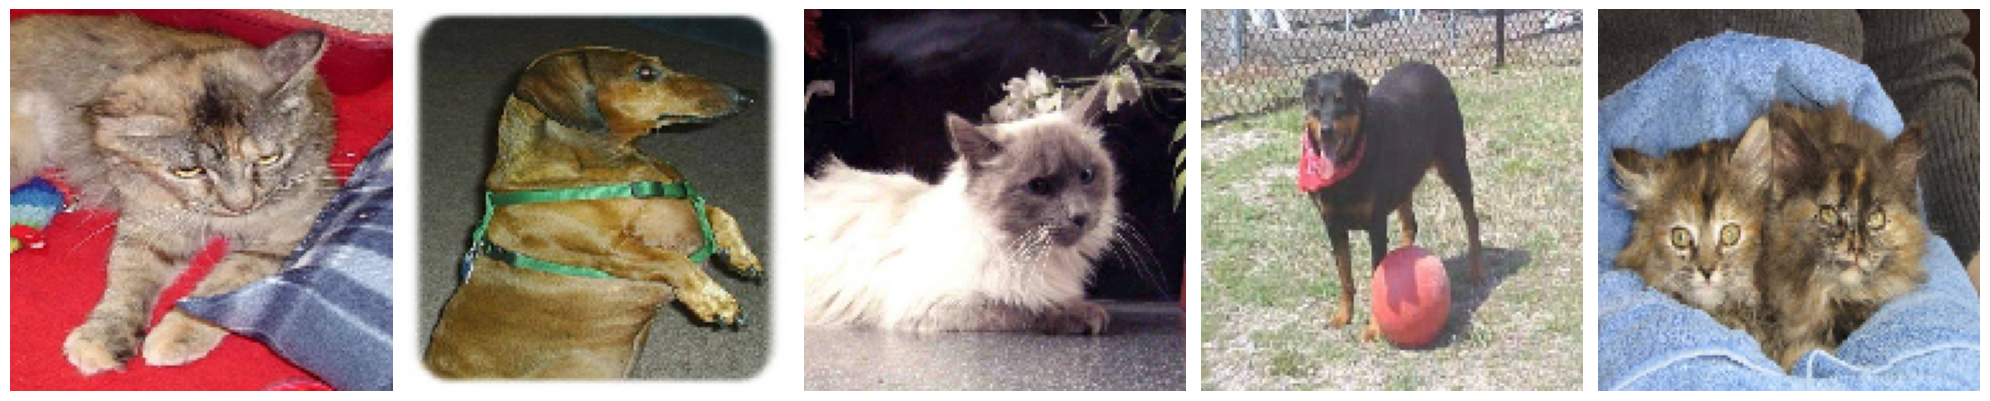

In [ ]:
# Hàm hiển thị ảnh
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Hiển thị 5 ảnh từ tập train
plotImages(sample_training_images[:5])

In [ ]:
# Định nghĩa mô hình CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 lớp đầu ra (cat, dog, horse)
])

# Compile mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Sử dụng categorical_crossentropy cho nhiều lớp
    metrics=['accuracy']
)

# In tóm tắt kiến trúc mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Số lượng mẫu trong tập train và validation
total_train = train_data_gen.samples
total_val = val_data_gen.samples

# Huấn luyện mô hình
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / BATCH_SIZE)),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / BATCH_SIZE))
)

Epoch 1/100
25/25 [==============================] - 13s 469ms/step - loss: 1.1140 - accuracy: 0.3704 - val_loss: 1.0258 - val_accuracy: 0.5645
Epoch 2/100
25/25 [==============================] - 12s 463ms/step - loss: 0.9062 - accuracy: 0.5493 - val_loss: 0.7483 - val_accuracy: 0.6194
Epoch 3/100
25/25 [==============================] - 12s 462ms/step - loss: 0.7812 - accuracy: 0.6235 - val_loss: 0.6859 - val_accuracy: 0.6742
Epoch 4/100
25/25 [==============================] - 12s 481ms/step - loss: 0.7534 - accuracy: 0.6496 - val_loss: 0.7249 - val_accuracy: 0.6452
Epoch 5/100
25/25 [==============================] - 12s 460ms/step - loss: 0.6915 - accuracy: 0.6866 - val_loss: 0.6430 - val_accuracy: 0.7194
Epoch 6/100
25/25 [==============================] - 12s 461ms/step - loss: 0.6211 - accuracy: 0.7245 - val_loss: 0.6284 - val_accuracy: 0.7258
Epoch 7/100
25/25 [==============================] - 12s 457ms/step - loss: 0.5785 - accuracy: 0.7421 - val_loss: 0.6346 - val_accuracy:

In [ ]:
# Lưu mô hình vào file .h5
model.save('cat_dog_horse_model.h5')

# Tải mô hình về máy local
from google.colab import files
files.download('cat_dog_horse_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>